 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [28]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [29]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [30]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [31]:
# Drop nulls
whale_returns = whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [32]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [33]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [34]:
# Drop nulls
algo_returns = algo_returns.dropna(inplace=True)


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [35]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [36]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [37]:
# Fix Data Types
#def convert_currency(val):
#    new_val = val.replace(',','').replace('$', '')
#    return float(new_val)
#sp500df = sp500df['Close'].apply(convert_currency)

In [38]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

<ipython-input-38-bfca993d4a5d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [39]:
## sp500_history.astype(int)

In [40]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [41]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

In [42]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"SP500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [43]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_total = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns",join = "inner")
df_total

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

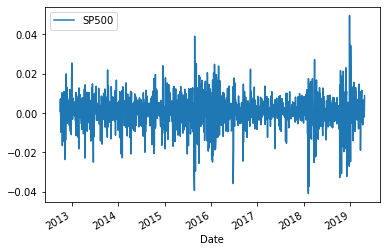

In [17]:
# Plot daily returns of all portfolios
df_total.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

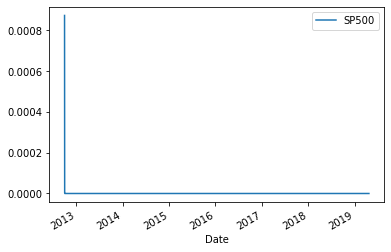

In [18]:
# Calculate cumulative returns of all portfolios
df_sum = df_total.cumprod()
# Plot cumulative returns
df_sum.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

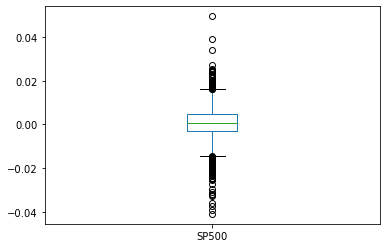

In [19]:
# Box plot to visually show risk
df_total.plot(kind="box")

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
stddev_all = df_total.std()

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
stddev_sp = sp500_daily_returns.std
# Determine which portfolios are riskier than the S&P 500
print(stddev_sp)

<bound method NDFrame._add_numeric_operations.<locals>.std of                SP500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]>


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
stddev_all * np.sqrt(252)

SP500    0.128762
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

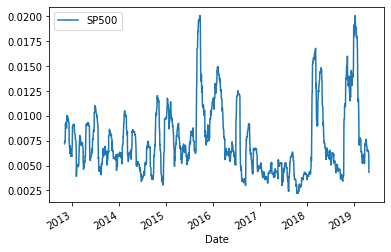

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = df_total.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
corr_mat = rolling_std.corr()
# Display de correlation matrix
print(corr_mat)

       SP500
SP500    1.0


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [25]:
# Calculate covariance of a single portfolio
covariance_tiger = df_total["TIGER GLOBAL MANAGEMENT LLC"].cov(df_total["SP500"])
# Calculate variance of S&P 500
variance_sp = df_total["SP500"].var()
# Computing beta
beta = covariance_tiger / variance_sp
# Plot beta trend
plot = beta.plot()

KeyError: 'TIGER GLOBAL MANAGEMENT LLC'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [44]:
# Use `ewm` to calculate the rolling window
df_total_ewm = df_total.ewm(span = 21).mean()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Annualized Sharpe Ratios
sharpe_ratios = df_total.mean()*252/(df_total.std()*np.sqrt(252))
sharpe_ratios

SP500    0.906028
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

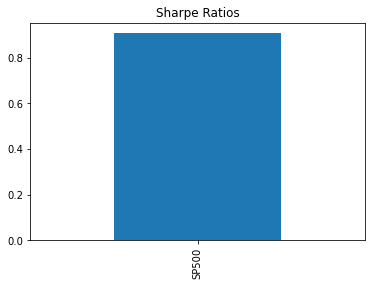

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [59]:
# Reading data from 1st stock
goog_csv = Path("Resources/goog_historical.csv")
goog = pd.read_csv(goog_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog.sort_index(ascending = True, inplace = True)

In [60]:
# Reading data from 2nd stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl = pd.read_csv(aapl_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl.sort_index(ascending=True, inplace=True)

In [62]:
# Reading data from 3rd stock
cost_csv = Path("Resources/cost_historical.csv")
cost = pd.read_csv(cost_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost.sort_index(ascending=True, inplace=True)

In [68]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog, aapl, cost])
combined_df

,Symbol,GOOG,AAPL,COST
Trade DATE,,,,
2018-05-11,GOOG,1098.26,NaN,NaN
2018-05-14,GOOG,1100.20,NaN,NaN
2018-05-15,GOOG,1079.23,NaN,NaN
2018-05-16,GOOG,1081.77,NaN,NaN
2018-05-17,GOOG,1078.59,NaN,NaN
...,...,...,...,...
2019-05-03,COST,NaN,NaN,244.62
2019-05-06,COST,NaN,NaN,244.23
2019-05-07,COST,NaN,NaN,240.18


In [72]:
# Reset Date index
combined_df.index = combined_df.index.normalize()

In [67]:
# Reorganize portfolio data by having a column per symbol
goog.rename(columns = {"NOCP":"GOOG"}, inplace = True)
aapl.rename(columns = {"NOCP":"AAPL"}, inplace = True)
cost.rename(columns = {"NOCP":"COST"}, inplace = True)
combined_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [73]:
# Calculate daily returns
dailydf = combined_df.pct_change()
# Drop NAs
dailydf = dailydf.dropna(inplace=True)
# Display sample data
dailydf

TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [50]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_return = weights * dailydf ["Symbol"] + weights * dailydf ["Symbol"]
# Display sample data
port_return

NameError: name 'dailydf' is not defined

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
full_return = pd.concat([returns, port_return])

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
full_return.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized `std`
new_std = full_return.std()

NameError: name 'full_return' is not defined

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
roll_std = new_std.rolling(window=21).std()
# Plot rolling standard deviation
roll_std.plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
roll_std.rolling(window=21).plot(ax=ax1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
rolling_covariance = port_returns['GOOG', 'AAPL', 'COST'].cov(port_returns['S&P 500'])
rolling_variance = port_returns['S&P 500'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of Portfolio Returns')
rolling_beta = rolling_covariance / rolling_variance

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind=bars, title="Sharpe Rations")

### How does your portfolio do?

Write your answer here!